In [1]:
import pandas as pd
import matplotlib as mpl

from pandas_datareader import data
from datetime import datetime
from dateutil.relativedelta import relativedelta
from tqdm.notebook import tqdm

mpl.rcParams['figure.max_open_warning'] = 0
pd.set_option('display.max_rows', 100)

In [2]:
fig_size_1 = (12, 4)
fig_size_2 = (9, 3)
top_n = 20
start_date = '1970-01-02'
today = datetime.today().strftime('%Y-%m-%d')
one_year = (datetime.today()-relativedelta(years=1)).strftime('%Y-%m-%d')
five_years = (datetime.today()-relativedelta(years=5)).strftime('%Y-%m-%d')
ten_years = (datetime.today()-relativedelta(years=10)).strftime('%Y-%m-%d')
twenty_years = (datetime.today()-relativedelta(years=20)).strftime('%Y-%m-%d')
thirty_years = (datetime.today()-relativedelta(years=30)).strftime('%Y-%m-%d')
period = start_date

In [3]:
def get_dma_analysis(ticker, start_date=start_date, end_date=datetime.today().strftime('%Y-%m-%d'), ma_period=200):
    df = data.DataReader(ticker, 'yahoo', start_date, end_date).reset_index()
    df['DMA'] = df['Close'].rolling(ma_period).mean()
    df['PCH_DMA'] = 100*(df['Close']-df['DMA'])/df['DMA']
    df['PCH_DMA_MEAN'] = df['PCH_DMA'].mean()
    df['PCH_DMA_MEDIAN'] = df['PCH_DMA'].median()
    df = df.round(3)
#     print('Start', df[['Date', 'Close']].set_index('Date').head(1).transpose())
#     print('\nEnd', df[['Date', 'Close', 'DMA', 'PCH_DMA', 'PCH_DMA_MEAN', 'PCH_DMA_MEDIAN']].set_index('Date').tail(1).transpose())
    return df
        
def plot_dma_analysis(df, start_date=start_date, end_date=datetime.today().strftime('%Y-%m-%d'), title=''):
    df[(df['Date'] >= start_date) & (df['Date'] <= end_date)].plot(
        x='Date', y=['Close', 'DMA'], style = ['-', '--'],
        figsize=fig_size_1, grid=True, title=title+' (price)')
    df[(df['Date'] >= start_date) & (df['Date'] <= end_date)].plot(
        x='Date', y=['PCH_DMA', 'PCH_DMA_MEAN', 'PCH_DMA_MEDIAN'], style=['-', '--', '--'],
        figsize=fig_size_1, grid=True, title=title+' (DMA)')
    
def plot_dma_hist(df, bins=100, title=''):
    df.plot(x='Date', y=['PCH_DMA'], kind='hist', bins=bins,
            figsize=fig_size_1, grid=True, title=title+' (DMA hist)')
    
def get_dma_percentile(df, bins=100):
    current_pch_dma_rank_percentile = round(100*df['PCH_DMA'].dropna().rank(axis=0).tail(1).values[0]/len(df['PCH_DMA'].dropna()), 2)
#     print('Current PCH DMA percentile:', current_pch_dma_rank_percentile)
    return(current_pch_dma_rank_percentile)

def get_dma_tickers(tickers, start_date=start_date):
    a, b, c, d, e, f = ([] for i in range(6))
    for ticker in tqdm(tickers):
        try:
            df = get_dma_analysis(ticker=ticker, start_date=start_date)
            a.append(get_dma_percentile(df))
            b.append(df[['PCH_DMA']].tail(1).values[0][0])
            c.append(df[['PCH_DMA_MEAN']].tail(1).values[0][0])
            d.append(df[['PCH_DMA_MEDIAN']].tail(1).values[0][0])
            e.append(df[['Close']].tail(1).values[0][0])
            f.append(df[['DMA']].tail(1).values[0][0])
        except:
            print(ticker)
    df = pd.DataFrame()
    df['ticker'] = tickers
    df['percentile'] = a
    df['pch'] = b
    df['pch_mean'] = c
    df['pch_median'] = d
    df['close'] = e
    df['dma'] = f    
    return df

def analyze_ticker_dma(ticker='^GSPC', start_date=start_date):    
    df = get_dma_analysis(ticker=ticker, start_date=start_date)
    plot_dma_analysis(df, start_date=start_date, title=ticker)
    print(ticker+' DMA percentile:', get_dma_percentile(df))
    plot_dma_hist(df, title=ticker)

In [12]:
my_tickers = ['AMZN', 'AAPL', 'FB', 'GOOGL', 'MSFT', 'UBER', 'XOM', 'BA', 'DAL', 'UAL', 'AAL', 'SMH', 'IVV',
              'VNQ',  '^GSPC', 'QQQ', 'SHV', 'CL=F', 'MCHI', 'INDA', 'INR=X', 'GLD', 'BTC-USD',
              'TSLA', 'BRK-B', 'V', 'WMT', 'JNJ', 'JPM', 'PG', 'MA', 'NVDA', 'UNH', 'DIS', 'BAC', 'KO', 'CRM',
              'NFLX', 'T', 'INTC', 'CVX', 'SBUX', 'IBM', 'AMD', 'LMT', 'MU', 'SPOT', 'TWTR',
              'BABA', 'TCEHY', 'TSM', 'XLK', 'XLV', 'XLC', 'XLY', 'XLF', 'XLI', 'XLP', 'XLU',
              'XLE', 'XLRE', 'XLB', 'VCSH', 'VGSH', 'BSV', 'BIV', 'BLV', 'BND']

sectors = ['XLK', 'XLV', 'XLY', 'XLC', 'XLF', 'XLI', 'XLP', 'XLU', 'XLB', 'XLE', 'XLRE', 'SPY']

bonds = ['SHV', 'VCSH', 'VGSH', 'VCIT', 'VGIT', 'VCLT', 'VGLT', 'BND']

dma_tickers = ['^GSPC', 'QQQ', 'AMZN', 'AAPL', 'FB', 'GOOGL', 'MFST', 'UBER', 'XOM', 'BND', 'VCSH',
               'MCHI', 'INDA', 'INR=X', 'BTC-USD', 'CL=F']

all_tickers = ['AAPL', 'MSFT', 'AMZN', 'FB', 'GOOGL', 'TSLA', 'V', 'WMT', 'JNJ', 'JPM', 'PG', 'NVDA', 'MA', 'UNH',
           'HD', 'DIS', 'VZ', 'CRM', 'BAC', 'KO', 'PYPL', 'CMCSA', 'ADBE', 'BRK-A', 'NFLX', 'NKE', 'PFE',
           'MRK', 'T', 'PEP', 'ABT', 'INTC', 'TMO', 'ABBV', 'CSCO', 'COST', 'ORCL', 'QCOM', 'CVX', 'TMUS',
           'ACN', 'DHR', 'MCD', 'XOM', 'AVGO', 'MDT', 'NEE', 'TXN', 'HON', 'UPS', 'BMY', 'LLY', 'UNP', 'LIN',
           'CHTR', 'AMGN', 'ZM', 'PM', 'SBUX', 'LOW', 'BA', 'C', 'RTX', 'WFC', 'MS', 'IBM', 'AMT', 'LMT',
           'BLK', 'AMD', 'NOW', 'MMM', 'CAT', 'INTU', 'AXP', 'FIS', 'SQ', 'SYK', 'SCHW', 'EL', 'CVS', 'TGT',
           'ISRG', 'GE', 'UBER', 'MDLZ', 'BKNG', 'SPGI', 'DE', 'ZTS', 'GS', 'ANTM', 'FISV', 'GILD', 'MO',
           'PLD', 'CI', 'ADP', 'CL', 'TJX', 'FDX', 'CCI', 'AMAT', 'BX', 'CSX', 'MU', 'DUK', 'BDX',
           'CB', 'SNAP', 'SHW', 'EQIX', 'ITW', 'SO', 'USB', 'D', 'LRCX', 'TFC', 'VMW', 'GM', 'NSC', 'ECL',
           'CME', 'APD', 'ATVI', 'MMC', 'GPN', 'ICE', 'VRTX', 'ADSK', 'REGN', 'PNC', 'PGR', 'HUM', 'EW', 'DG',
           'TEAM', 'MCO', 'NOC', 'DELL', 'WM', 'HCA', 'ADI', 'WDAY', 'NEM', 'SPOT', 'BSX', 'TWLO', 'KMB',
           'ETN', 'DD', 'EMR', 'LULU', 'MNST', 'SCCO', 'ILMN', 'LVS', 'GD', 'ROP', 'COP', 'KDP', 'EPD',
           'VEEV', 'PINS', 'MET', 'DOCU', 'AEP', 'EXC', 'DOW', 'CTSH', 'CVNA', 'LHX', 'DLR', 'IDXX', 'KHC',
           'BAX', 'PSA', 'TTD', 'ROST', 'MAR', 'MRNA', 'COF', 'APH', 'CTAS', 'SRE', 'BIIB', 'GIS', 'KLAC',
           'INFO', 'TEL', 'CNC', 'XEL', 'CMG', 'SYY', 'TWTR', 'EA', 'ALGN', 'CSGP', 'MTCH', 'TT', 'PH', 'A',
           'F', 'CMI', 'MCHP', 'TRV', 'STZ', 'PPG', 'EBAY', 'BK', 'XLK', 'XLV', 'XLC', 'XLY', 'XLF', 'XLI',
           'XLP', 'XLU', 'XLE', 'XLRE', 'XLB', 'VCSH', 'VGSH', 'BSV', 'BIV', 'BLV', 'BND', 'QQQ', 'IVV', 'SHV',
           'CL=F', 'MCHI', 'INDA', 'GLD', 'BTC-USD', 'DAL', 'UAL', 'AAL', 'SMH']

In [5]:
df_my_tickers = get_dma_tickers(my_tickers, start_date=period)

<AxesSubplot:xlabel='ticker'>

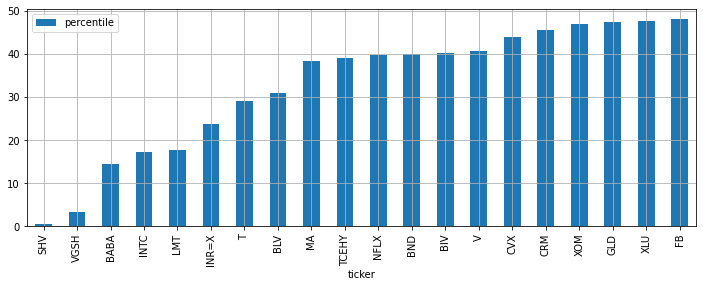

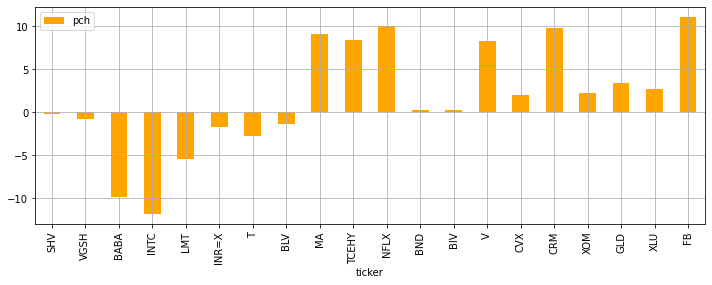

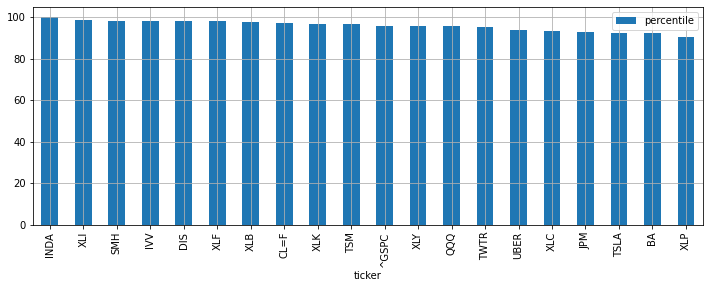

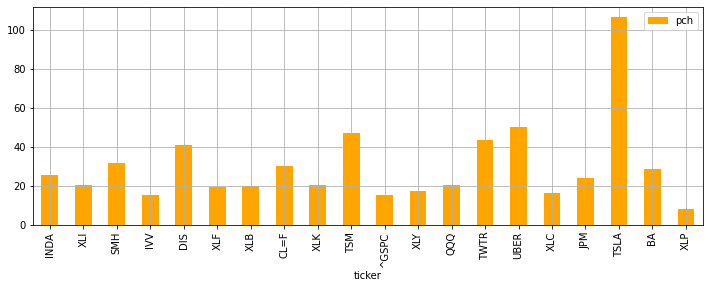

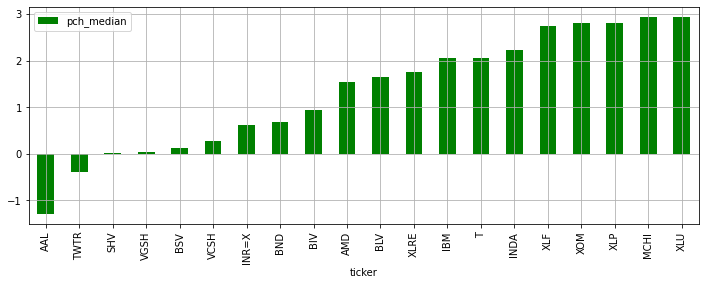

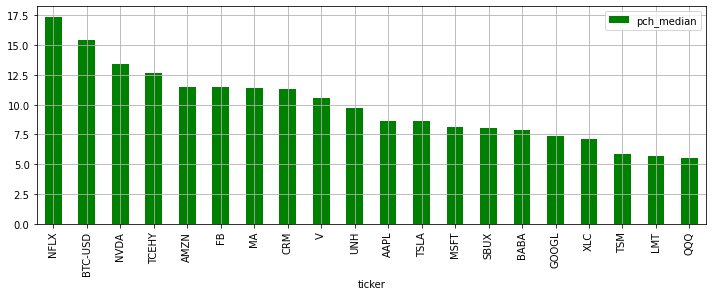

In [6]:
df_my_tickers.sort_values(by='percentile', ascending=True).head(top_n).plot(
    x='ticker', y=['percentile'], kind='bar', figsize=fig_size_1, grid=True)
df_my_tickers.sort_values(by='percentile', ascending=True).head(top_n).plot(
    x='ticker', y=['pch'], kind='bar', figsize=fig_size_1, grid=True, color='orange')

df_my_tickers.sort_values(by='percentile', ascending=False).head(top_n).plot(
    x='ticker', y=['percentile'], kind='bar', figsize=fig_size_1, grid=True)
df_my_tickers.sort_values(by='percentile', ascending=False).head(top_n).plot(
    x='ticker', y=['pch'], kind='bar', figsize=fig_size_1, grid=True, color='orange')

df_my_tickers.sort_values(by='pch_median', ascending=True).head(top_n).plot(
    x='ticker', y=['pch_median'], kind='bar', figsize=fig_size_1, grid=True, color='green')
df_my_tickers.sort_values(by='pch_median', ascending=False).head(top_n).plot(
    x='ticker', y=['pch_median'], kind='bar', figsize=fig_size_1, grid=True, color='green')

In [7]:
df_sectors = get_dma_tickers(sectors, start_date=period)

<AxesSubplot:xlabel='ticker'>

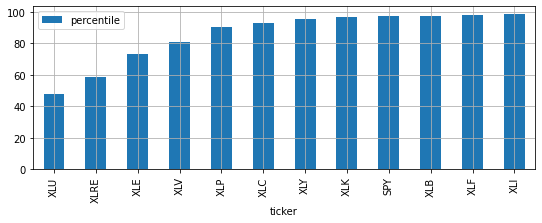

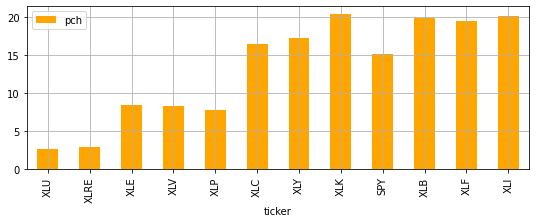

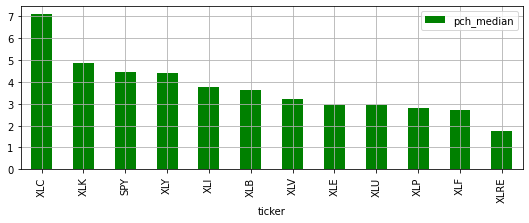

In [8]:
df_sectors.sort_values(by='percentile', ascending=True).plot(
    x='ticker', y=['percentile'], kind='bar', figsize=fig_size_2, grid=True)
df_sectors.sort_values(by='percentile', ascending=True).plot(
    x='ticker', y=['pch'], kind='bar', figsize=fig_size_2, grid=True, color='orange')

df_sectors.sort_values(by='pch_median', ascending=False).plot(
    x='ticker', y=['pch_median'], kind='bar', figsize=fig_size_2, grid=True, color='green')

In [9]:
df_bonds = get_dma_tickers(bonds, start_date=period)

<AxesSubplot:xlabel='ticker'>

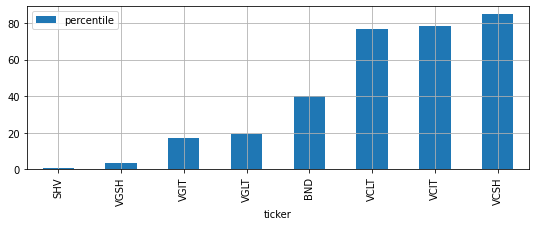

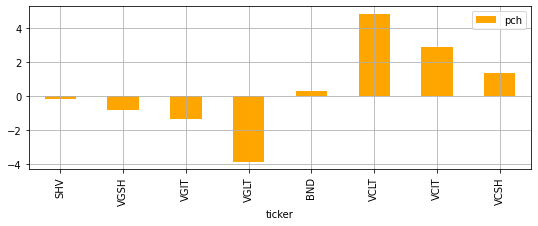

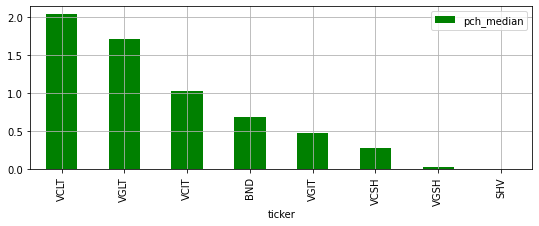

In [10]:
df_bonds.sort_values(by='percentile', ascending=True).plot(
    x='ticker', y=['percentile'], kind='bar', figsize=fig_size_2, grid=True)
df_bonds.sort_values(by='percentile', ascending=True).plot(
    x='ticker', y=['pch'], kind='bar', figsize=fig_size_2, grid=True, color='orange')

df_bonds.sort_values(by='pch_median', ascending=False).plot(
    x='ticker', y=['pch_median'], kind='bar', figsize=fig_size_2, grid=True, color='green')

^GSPC DMA percentile: 95.82
QQQ DMA percentile: 95.5
AMZN DMA percentile: 49.83
AAPL DMA percentile: 85.6
FB DMA percentile: 48.04
GOOGL DMA percentile: 78.72
MFST DMA percentile: 99.52
UBER DMA percentile: 93.9
XOM DMA percentile: 46.9
BND DMA percentile: 40.0
VCSH DMA percentile: 84.81
MCHI DMA percentile: 79.23
INDA DMA percentile: 99.8
INR=X DMA percentile: 23.63
BTC-USD DMA percentile: 90.16
CL=F DMA percentile: 96.9


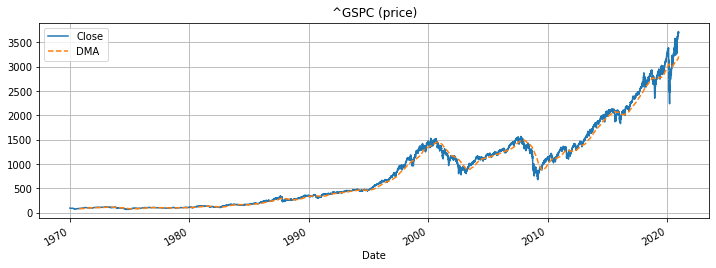

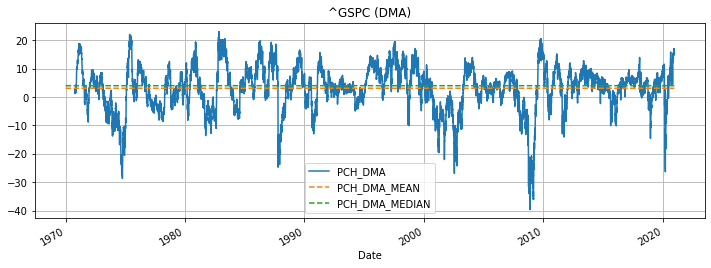

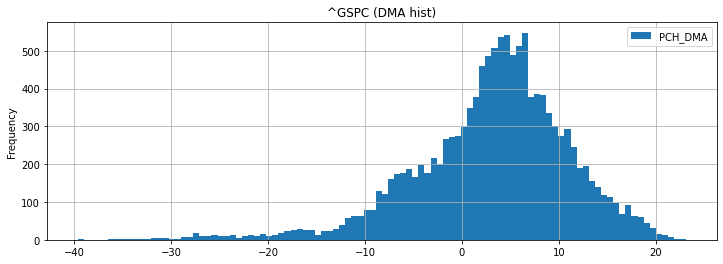

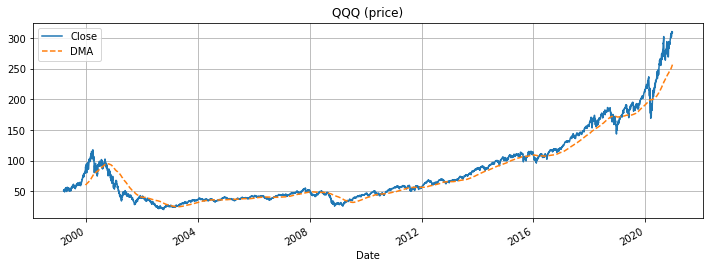

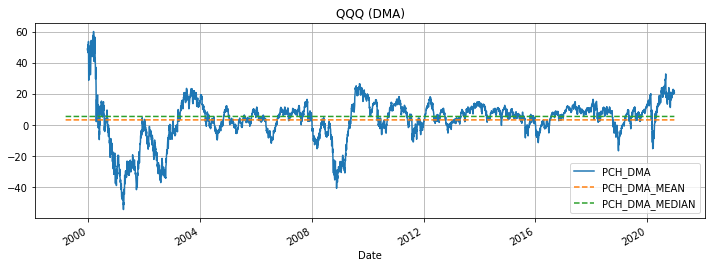

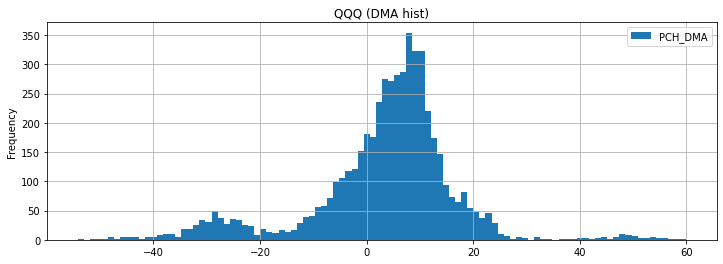

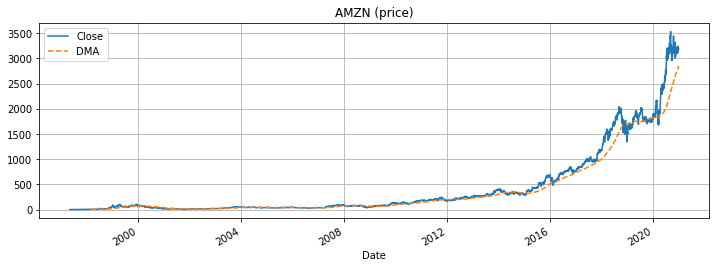

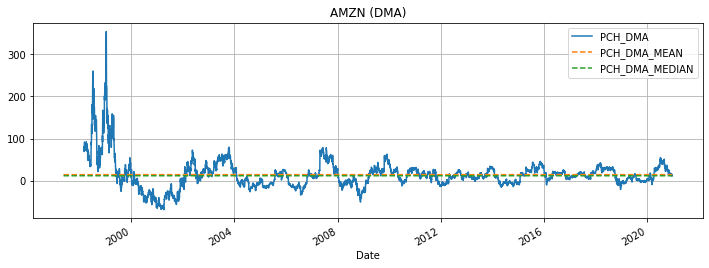

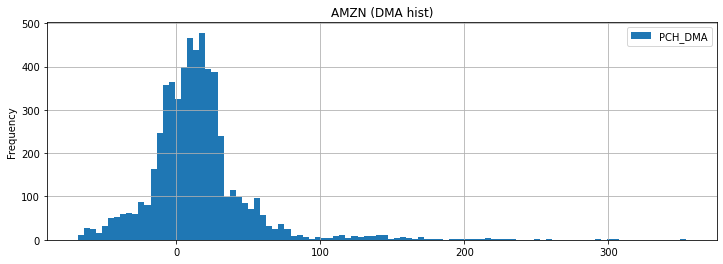

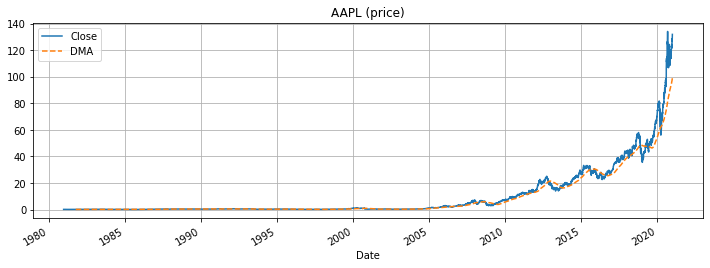

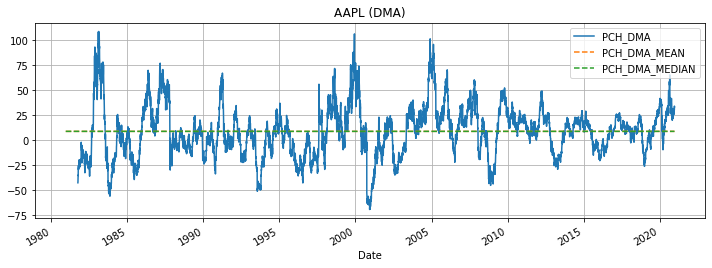

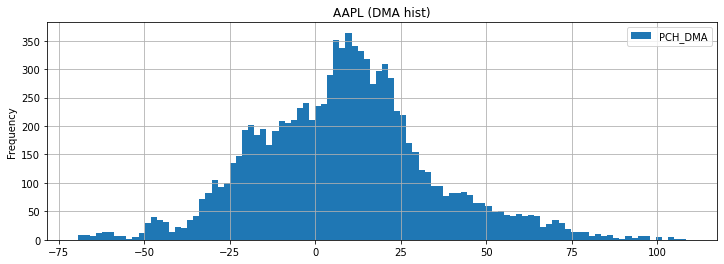

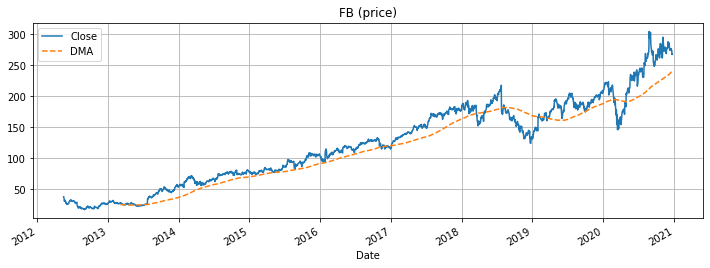

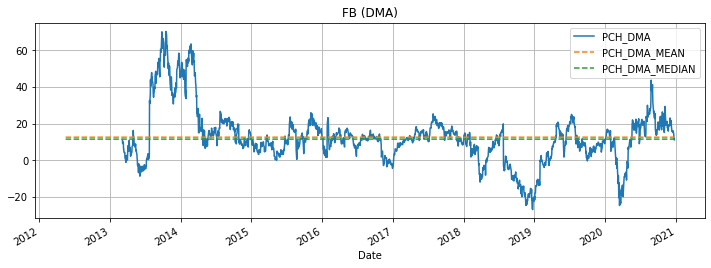

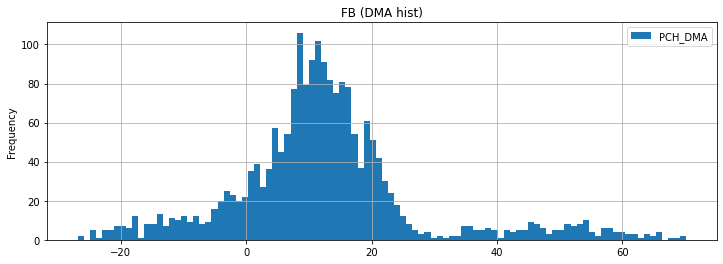

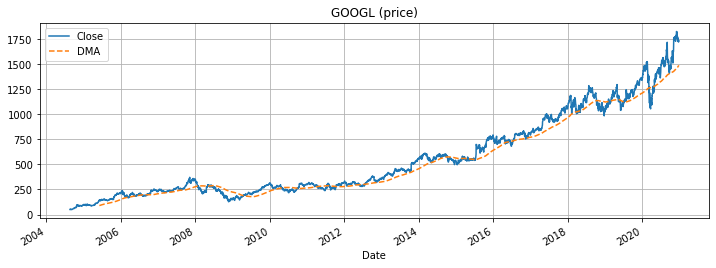

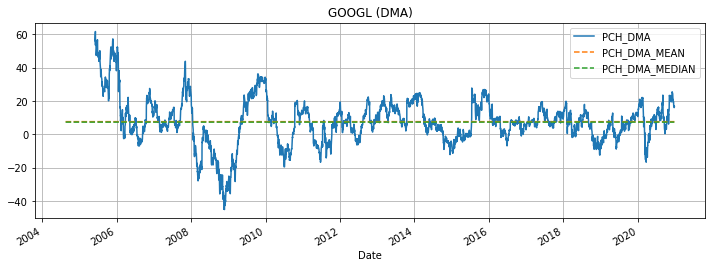

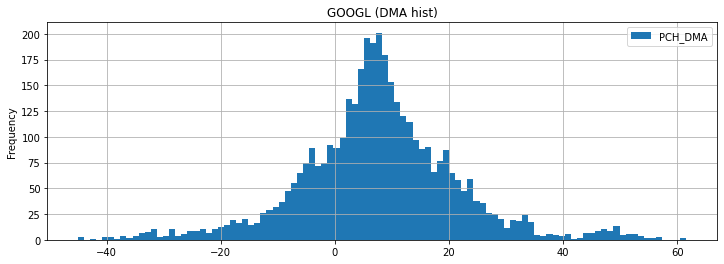

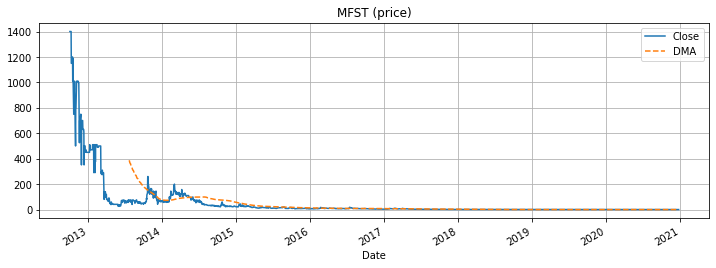

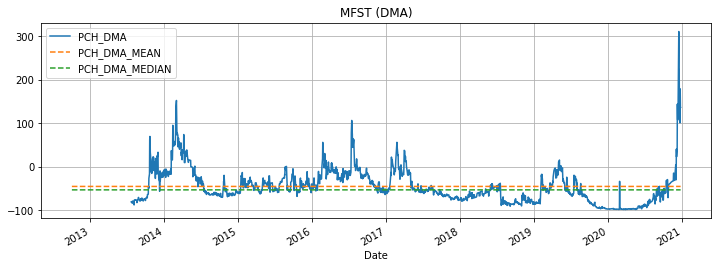

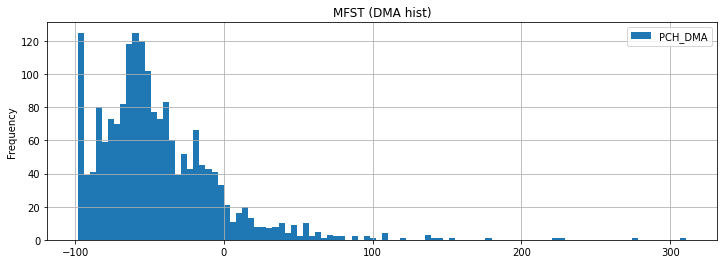

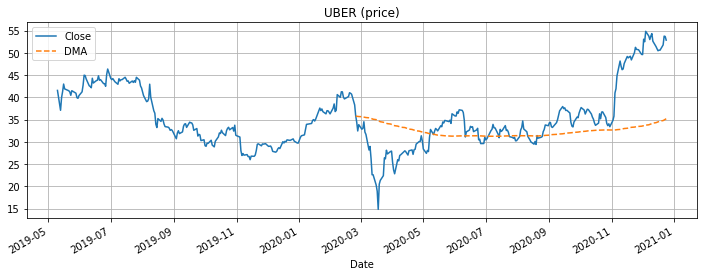

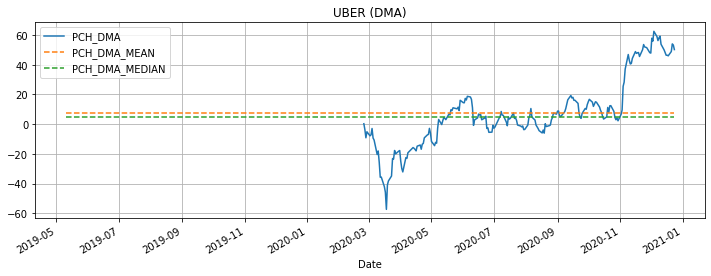

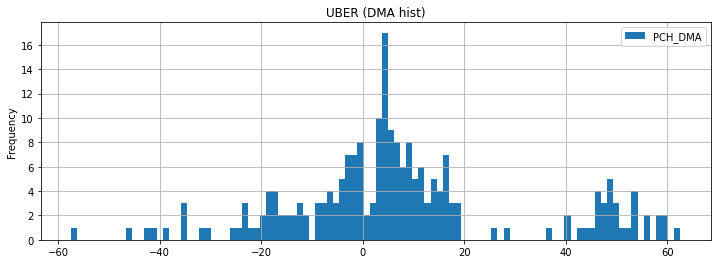

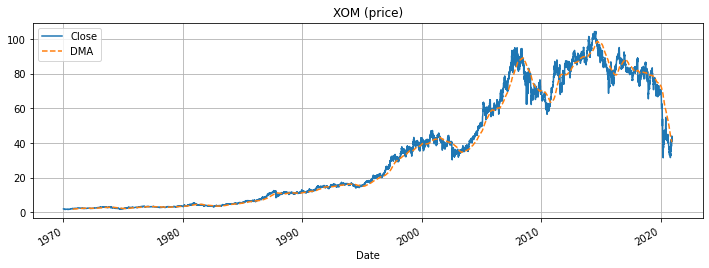

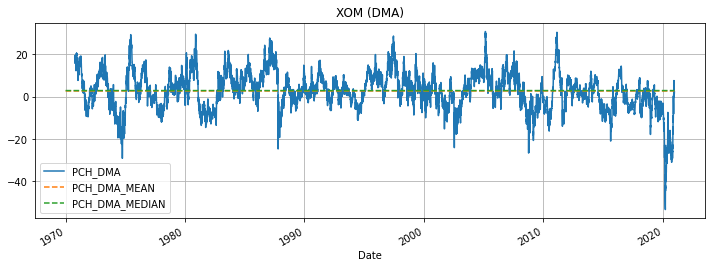

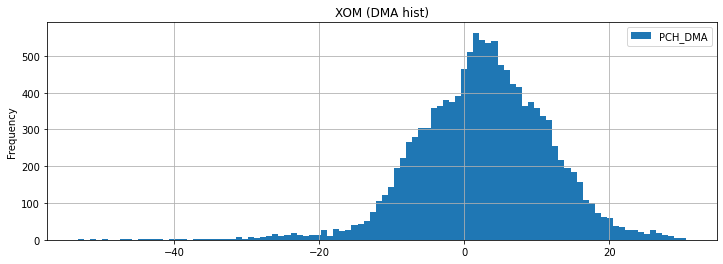

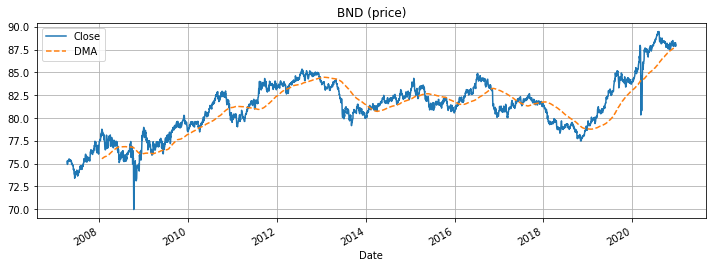

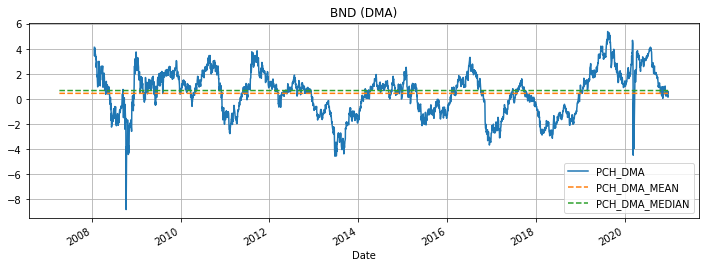

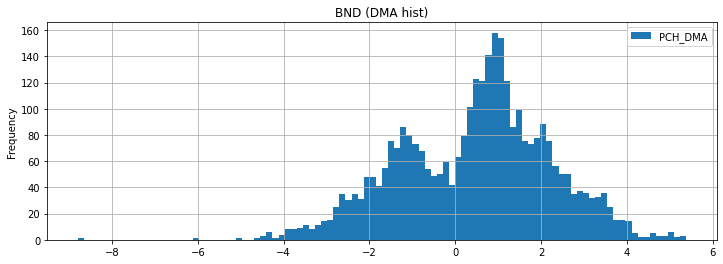

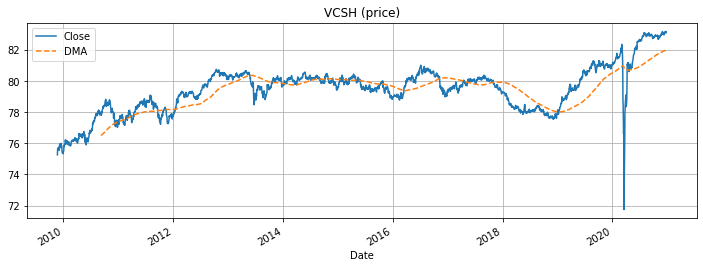

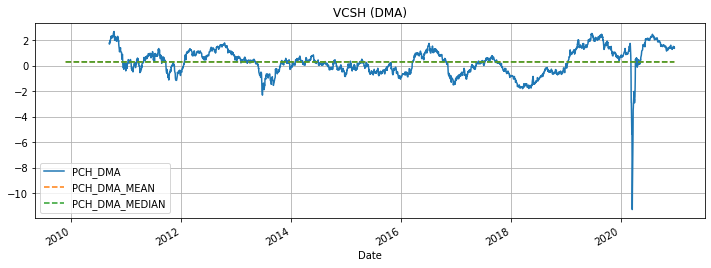

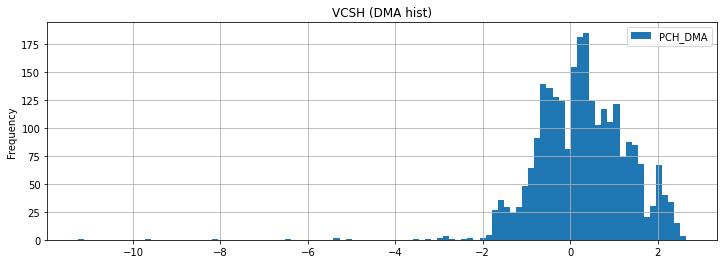

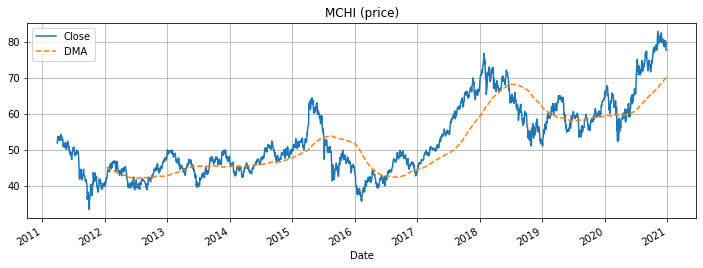

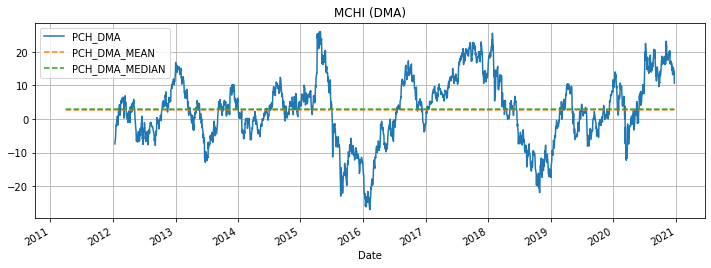

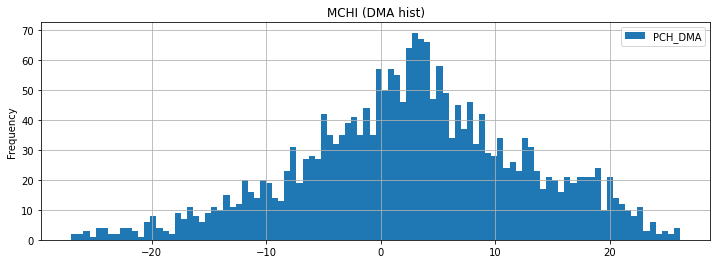

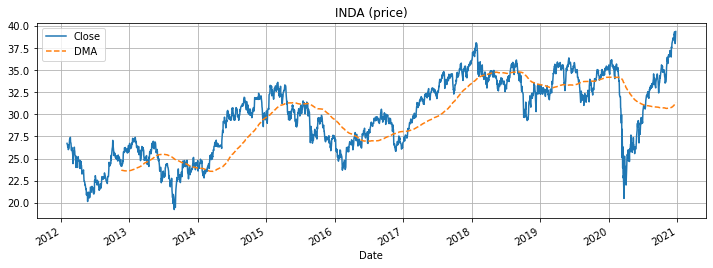

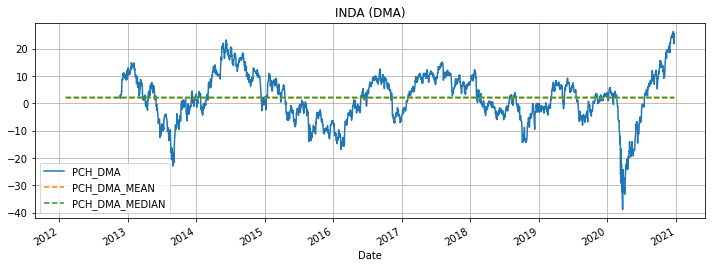

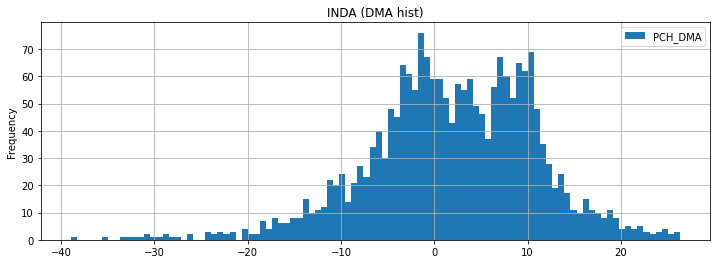

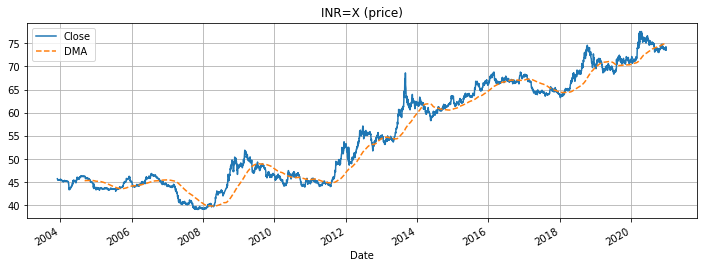

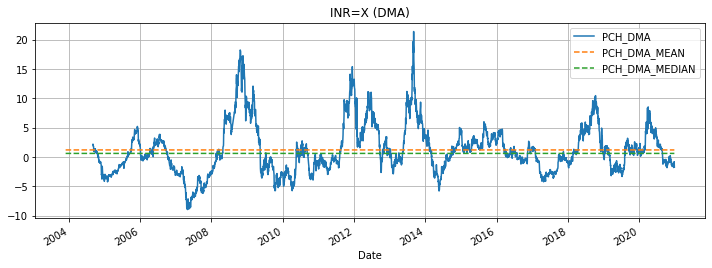

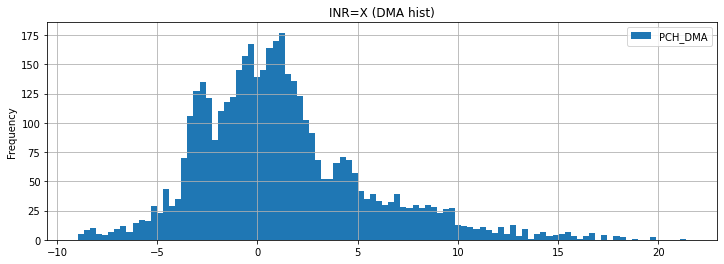

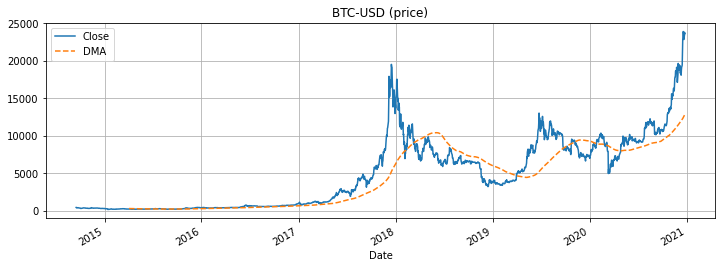

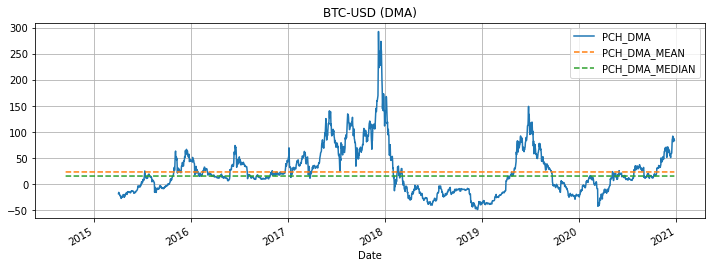

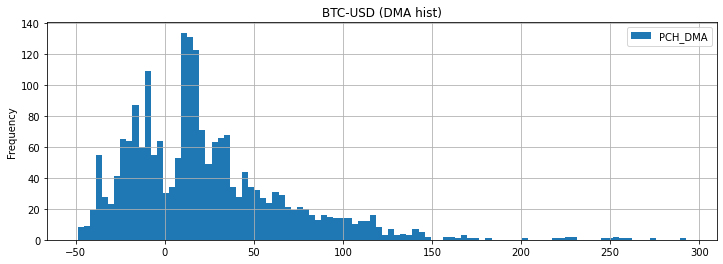

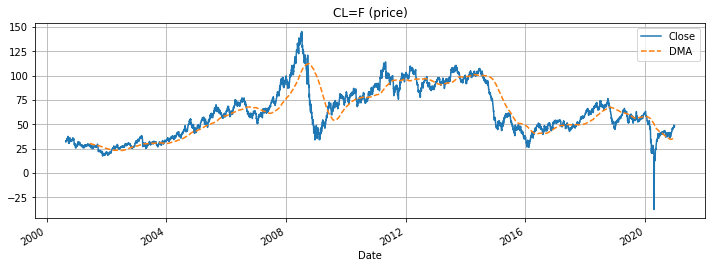

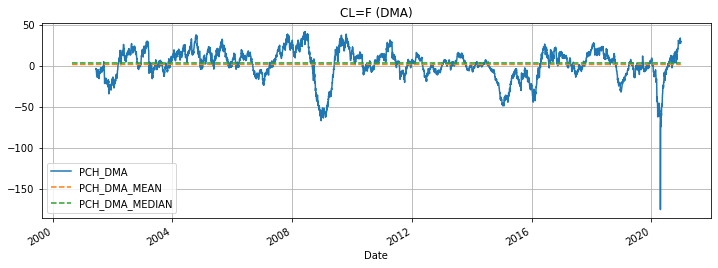

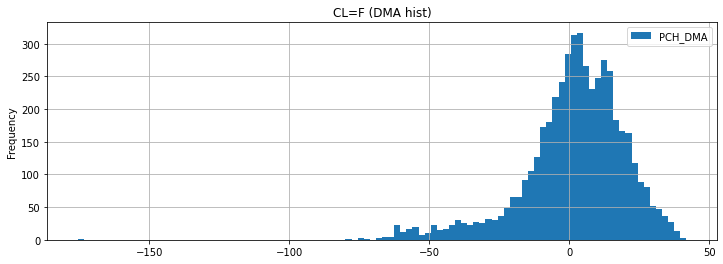

In [13]:
for t in dma_tickers:
    analyze_ticker_dma(t, start_date=period)